## Table of Content

1. [Executive Summary](#cell_Summary)

2. [Data Preprocessing](#cell_Preprocessing)

3. [Predictive Modeling](#cell_model)

4. [Experiments Report](#cell_report)



<a id = "cell_Summary"></a>
## 1. Executive Summary

this prediction model has been developed to predict house prices based on certain aspects of houses. More specifically, the model will look at variables such as number of bedrooms, bathrooms, floors,sqft among different areas of the house, grade of the house and condition among many other variables to make accurate predictions. The dataset has been scaled to a range of 0 to 1 to account for differences in scales as well as to minimise bias from the model. The model uses only numeric variables since selected categrical columns have been encoded. Further, the model is able to predict house prices with a mean absolute error of 68382.33. given the mean value of house prices at 535,567.92, the performance of this model is satisfactory. However, the performance can be imporved with the use of new data with less skewness and outliers. This model can be deployed for use in industries such as real estate and insurance to conduct valuation of a residential property.

<a id = "cell_Preprocessing"></a>
## 2. Data Preprocessing

The house price dataset consists of 21 columns and 20 000 rows. The dataset didnot consist of any missing values. However, the data were in different formats such as numericals and object format. Since the given requirnment is to predict the house prices, data has been selected and processed accordingly.

The categorical columns of condition and grade was selected to be dummy coded and included in the prediction models based on their relationship with price. Further, other columns such as id have been dropped.

Moreover, during EDA it was noted that year renovated and sqft lot and sqft lot 15 have 0 as the majority value. Therefore, these columns along with the categorical columns with significant class imbalances such as waterfront and view have also been dropped from the analysis.

Moreover, it was noted that the sqft living had outlier values which were above 4000, along with this the number of bedrooms also had outliers when considering rooms over 5, which was also dropped. After the data cleaning process there are 19067 samples to work with.

Once the data is cleaned,the remaining two categorical columns condition and grade were hot one encoded. Then feature scaling was done using min max scaler to avoid bias of the model.

Once the data preprocessing is completed, the data was divided to test and train sets 70% and 30% respectivly.

However, it is important to note that most of the columns both numerical and categorical are not normally distributed. the skewness and outliers in data can impact the models performance as it will increase bias.



#Required Libraries

In [ ]:
#Loading standard python libraries
from __future__ import print_function
import os
import math
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [ ]:
#Loading sklearn and its wrappers
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

In [ ]:
#Setting display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
# Defining function to get unique value counts of a dataset
def unique_vcount(df, column_name):
    vcounts = df[column_name].value_counts()
    num_unique = df[column_name].nunique()
    print(f"Unique values in '{column_name}':\n{vcounts}")
    print(f"Total number of unique values in '{column_name}': {num_unique}")

In [ ]:
#Defining function to describe a numeric variable
def describe_column(df,column_name):
    col_description = df[column_name].describe()
    print(col_description)

In [ ]:
#loading dataset
paris_houses = pd.read_csv("/content/Part1_house_price.csv")

In [ ]:
#Inspecting the number of rows and columns
paris_houses.shape

(20000, 21)

In [ ]:
#Inspecting columns and data types along with missing values
#paris_houses.info()

In [ ]:
# Columns such as bathroom and floors have float values. Rounding up to indicate a value such as 2.5 floors as 3.
columns_to_convert = ['bathrooms', 'floors']

# Apply numpy.ceil() to the specific columns and convert to int64
paris_houses[columns_to_convert] = np.ceil(paris_houses[columns_to_convert]).astype('int64')
paris_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20000 non-null  int64  
 1   date           20000 non-null  object 
 2   price          20000 non-null  float64
 3   bedrooms       20000 non-null  int64  
 4   bathrooms      20000 non-null  int64  
 5   sqft_living    20000 non-null  int64  
 6   sqft_lot       20000 non-null  int64  
 7   floors         20000 non-null  int64  
 8   waterfront     20000 non-null  int64  
 9   view           20000 non-null  int64  
 10  condition      20000 non-null  int64  
 11  grade          20000 non-null  int64  
 12  sqft_above     20000 non-null  int64  
 13  sqft_basement  20000 non-null  int64  
 14  yr_built       20000 non-null  int64  
 15  yr_renovated   20000 non-null  int64  
 16  zipcode        20000 non-null  int64  
 17  lat            20000 non-null  float64
 18  long  

In [ ]:
#Inspecting 10 rows
#paris_houses.sample(10)

In [ ]:
#unique_vcount(paris_houses, 'view')

#Exploratory Data Analysis

Univariate Analysis

Description of numeric column data

In [ ]:
paris_houses.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,"20,000.00",20000,"20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00","20,000.00"
unique,NaN,371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,"4,569,161,591.62",NaN,"535,567.92",3.36,2.39,"2,057.91","15,606.37",1.50,0.01,0.24,3.44,7.61,"1,757.47",300.43,"1,967.96",90.81,"98,078.16",47.56,-122.22,"1,974.29","13,115.94"
std,"2,866,264,106.99",NaN,"366,184.52",0.93,0.92,905.63,"41,770.24",0.55,0.09,0.78,0.67,1.17,811.61,447.62,28.32,415.94,54.05,0.14,0.14,675.24,"26,942.70"
min,"1,000,102.00",NaN,"75,000.00",0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,"1,900.00",0.00,"98,001.00",47.16,-122.52,399.00,651.00
25%,"2,123,049,166.75",NaN,"317,000.00",3.00,2.00,"1,420.00","5,350.00",1.00,0.00,0.00,3.00,7.00,"1,180.00",0.00,"1,950.00",0.00,"98,033.00",47.47,-122.33,"1,490.00","5,347.75"
50%,"3,905,080,295.00",NaN,"449,950.00",3.00,2.00,"1,900.00","7,819.00",1.00,0.00,0.00,3.00,7.00,"1,540.00",0.00,"1,969.00",0.00,"98,065.00",47.57,-122.23,"1,830.00","7,778.50"
75%,"7,300,250,427.50",NaN,"640,000.00",4.00,3.00,"2,510.00","11,000.00",2.00,0.00,0.00,4.00,8.00,"2,150.00",590.00,"1,991.00",0.00,"98,118.00",47.68,-122.13,"2,337.00","10,240.00"


Columns with extreme values


1.   SQFT lot
2.   SQFT living




#Univariate Data visualisation

In [ ]:
#categorising variables with numeric values for visualisation purposes
numerical_columns = ['price', 'bedrooms','bathrooms','sqft_living','sqft_lot','floors','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15'] #list of numericals

In [ ]:
#List of categoricals
categorical_columns = [col for col in paris_houses.columns if col not in numerical_columns]
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['id', 'date', 'waterfront', 'view', 'condition', 'grade', 'zipcode']


In [ ]:
# Drop the 'id' column if it exists in the list
if 'id' in categorical_columns:
    categorical_columns.remove('id')
    categorical_columns.remove('zipcode')
print("Updated Categorical Columns:", categorical_columns)

Updated Categorical Columns: ['date', 'waterfront', 'view', 'condition', 'grade']


In [ ]:
# Create DataFrames based on these lists
numerical_df = paris_houses[numerical_columns]
categorical_df = paris_houses[categorical_columns]

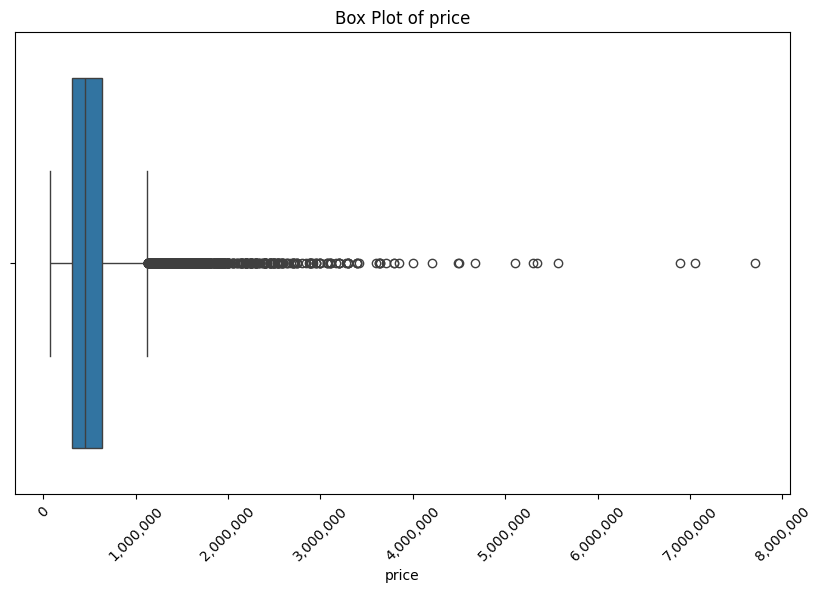

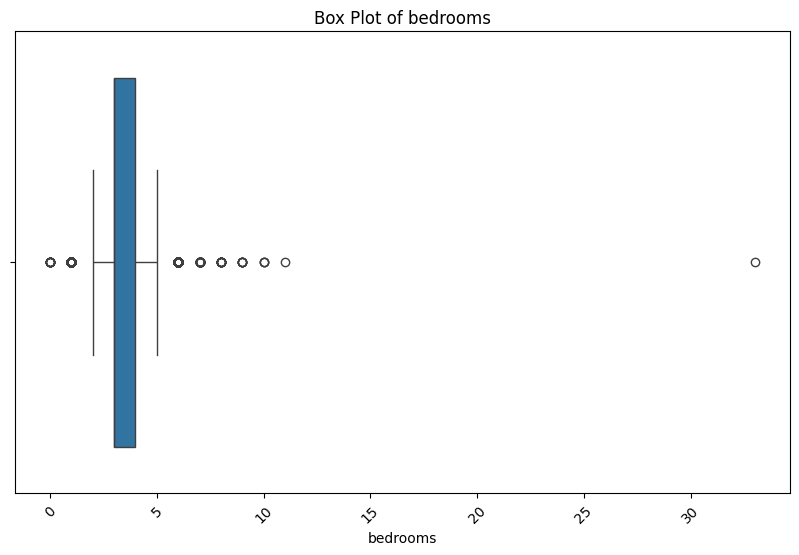

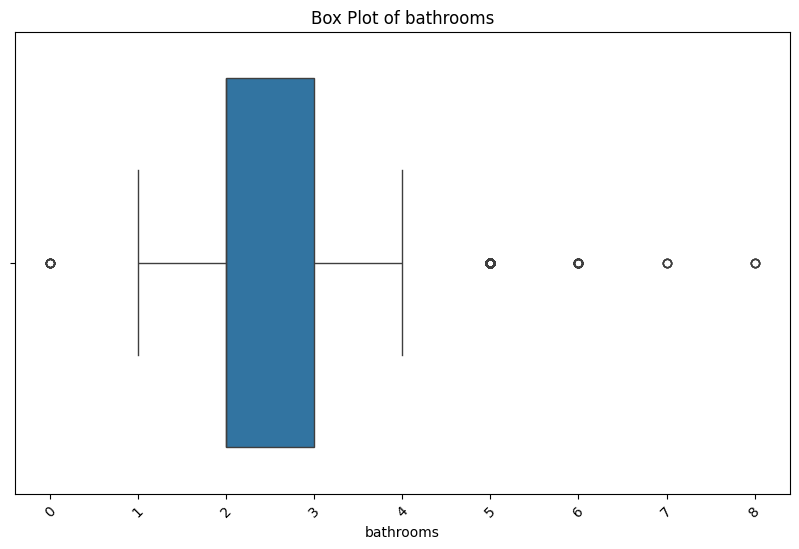

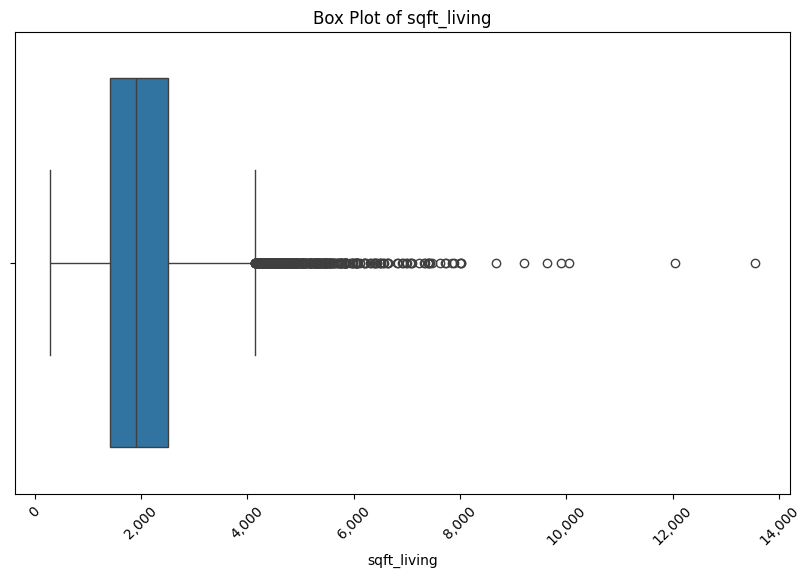

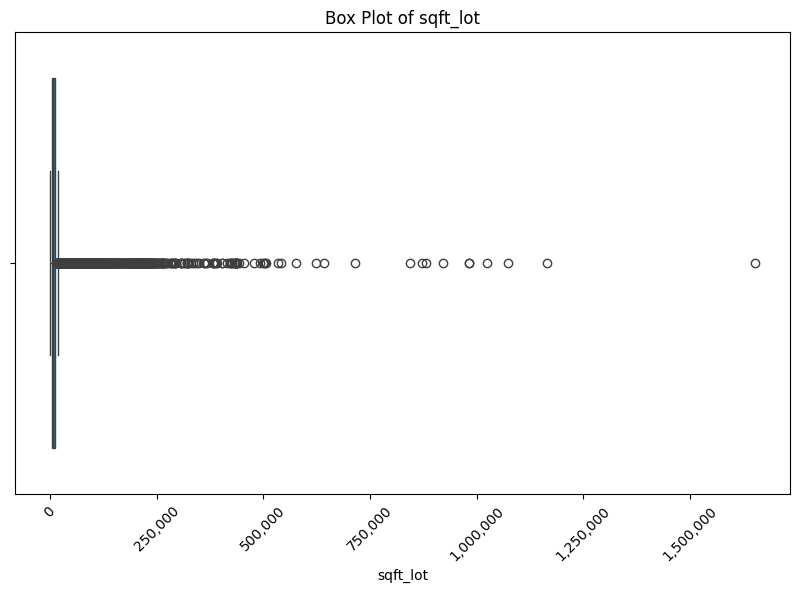

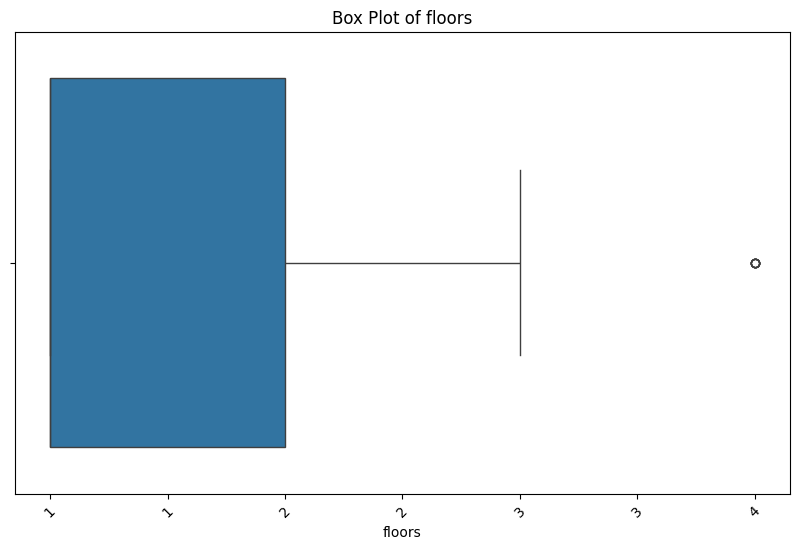

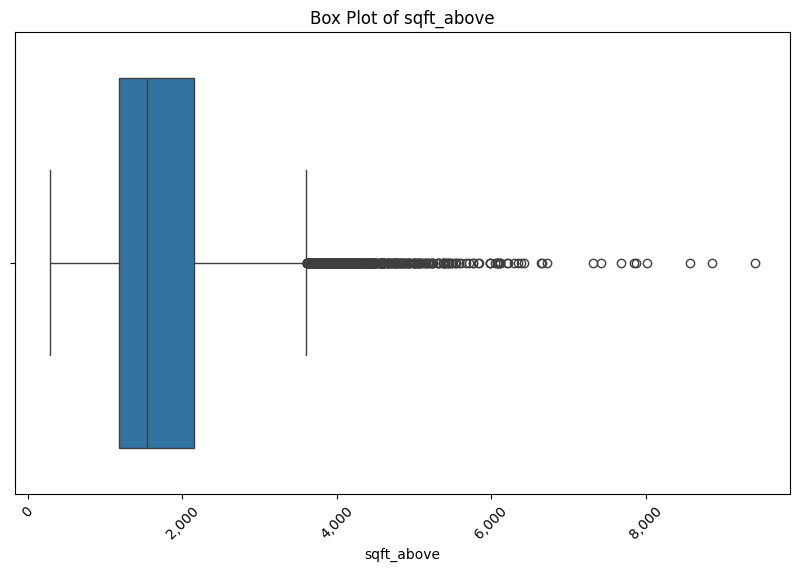

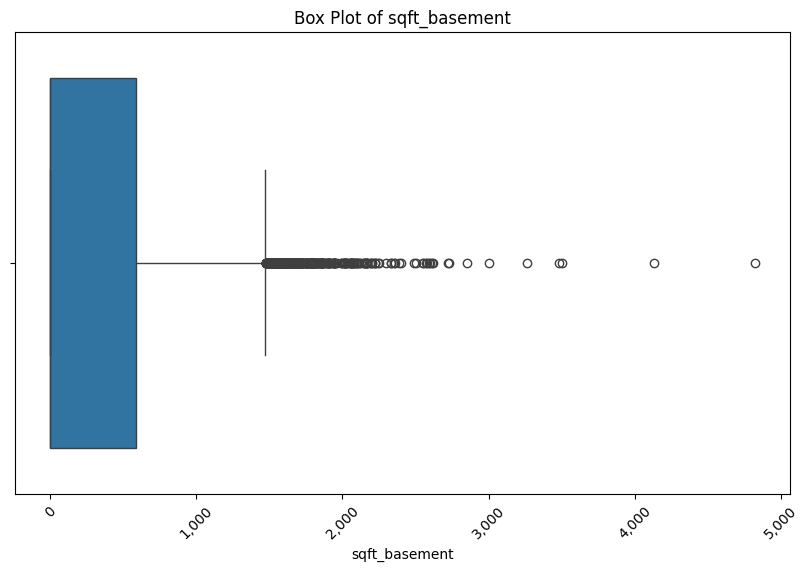

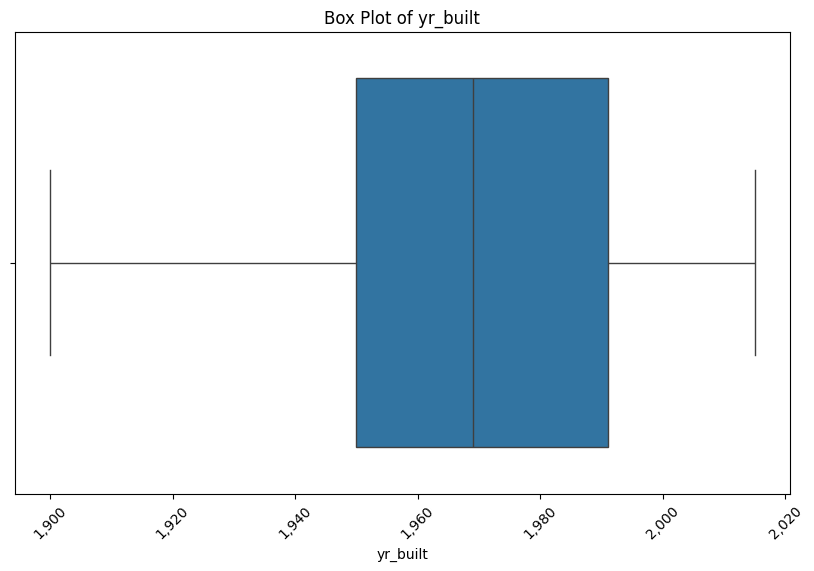

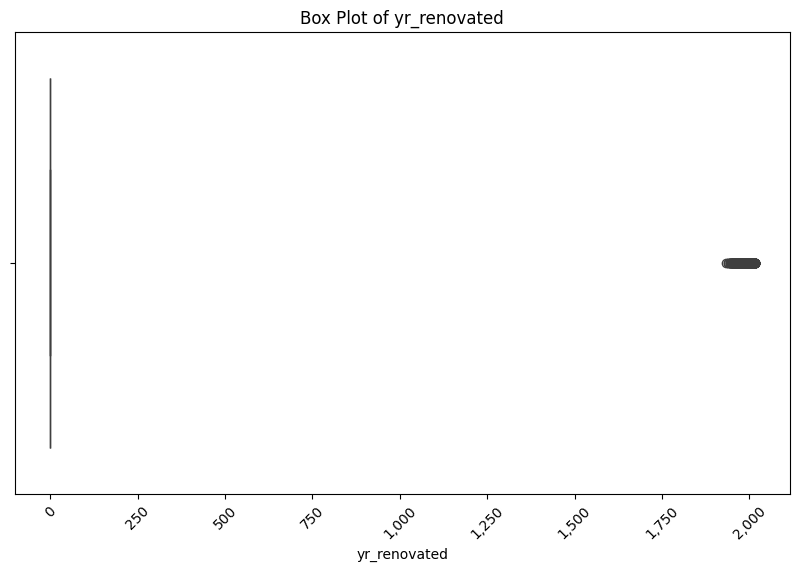

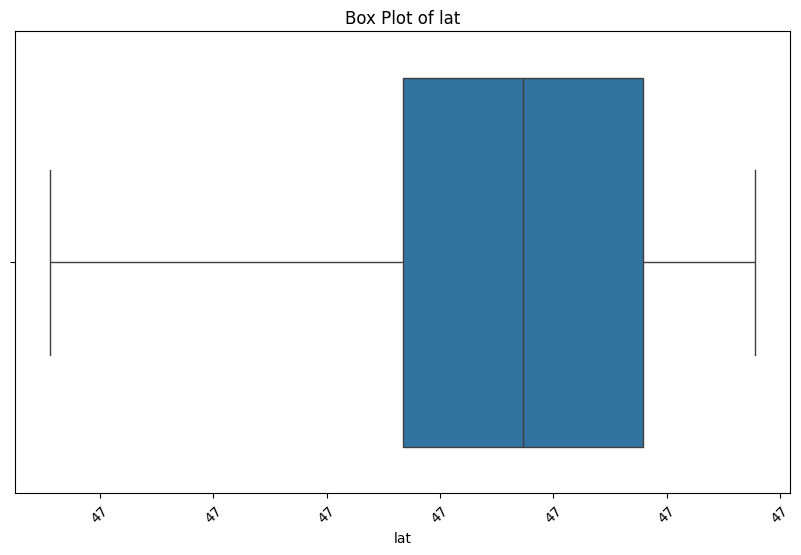

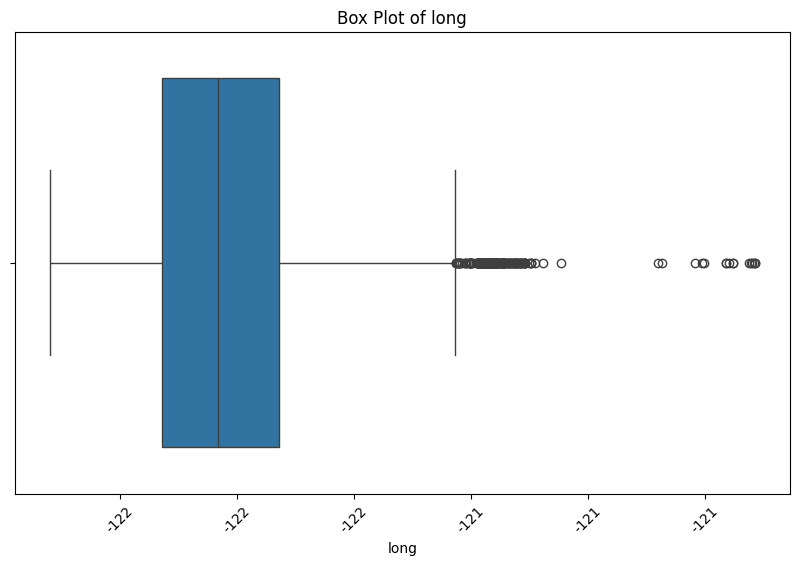

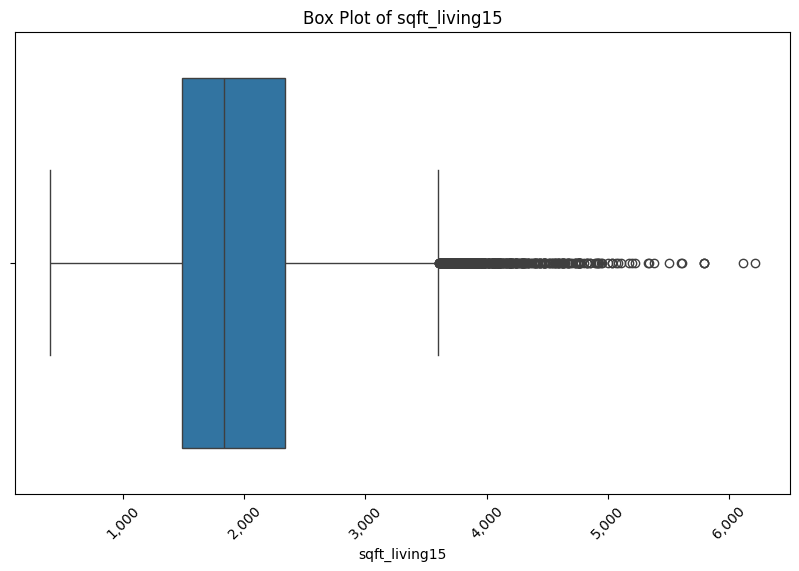

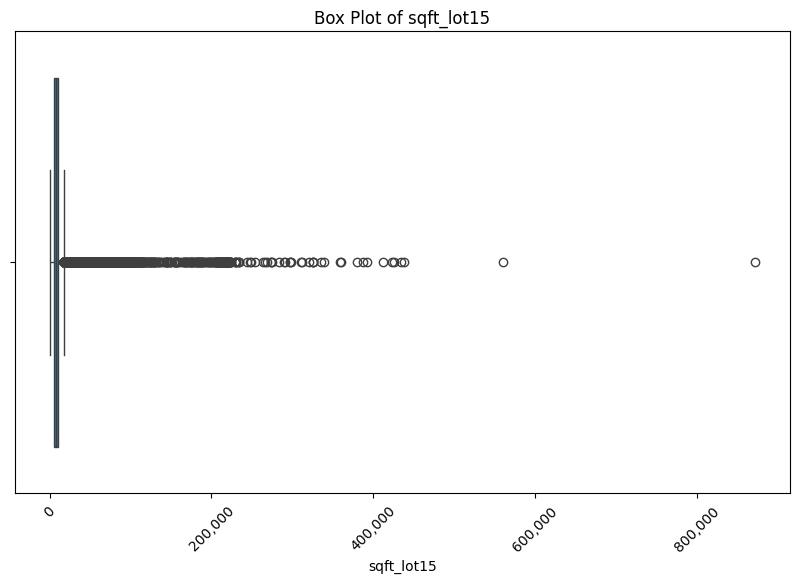

In [ ]:
for variable in numerical_columns:
    plt.figure(figsize=(10, 6))

    # Create a box plot for the variable
    ax = sns.boxplot(data=numerical_df, x=variable)

    # Format x-axis labels to avoid scientific notation (if needed)
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    plt.title(f"Box Plot of {variable}")
    plt.xlabel(variable)
    plt.show()

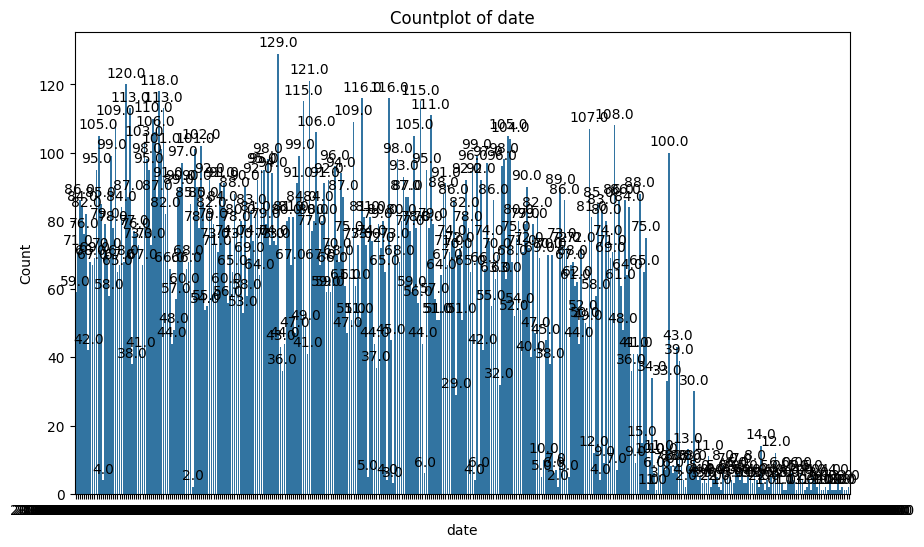

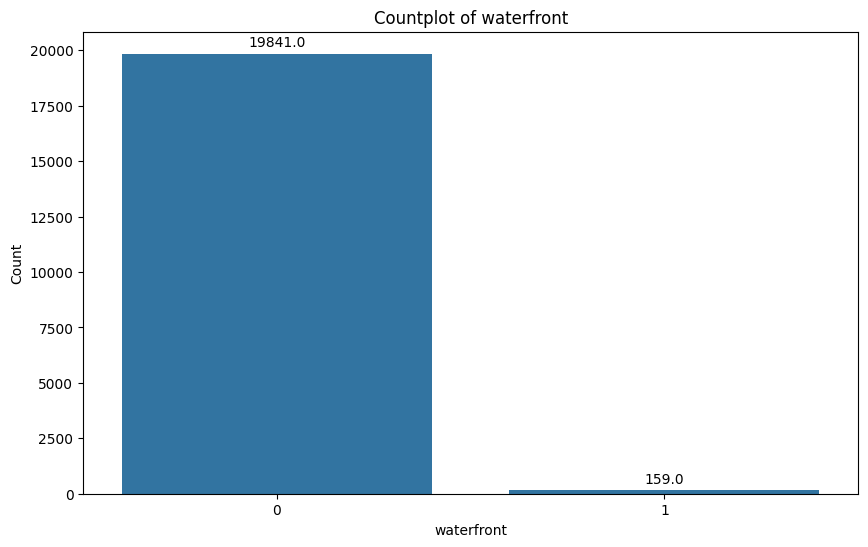

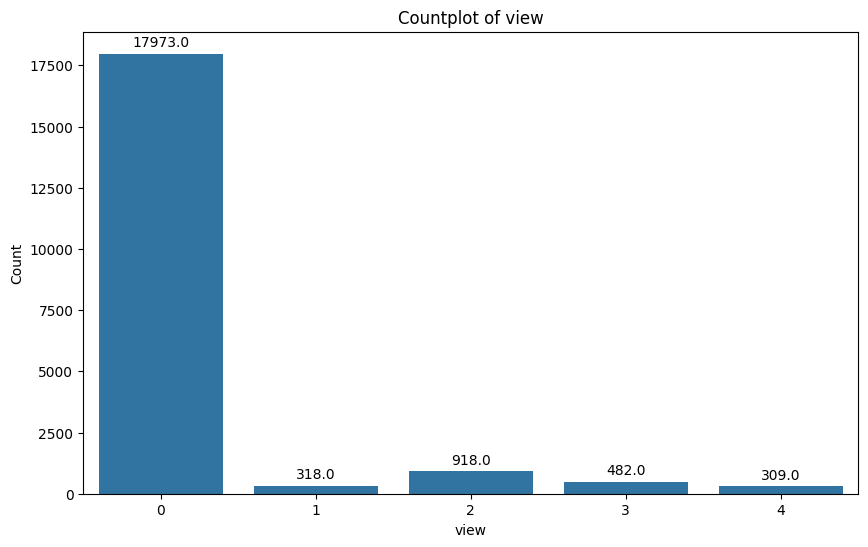

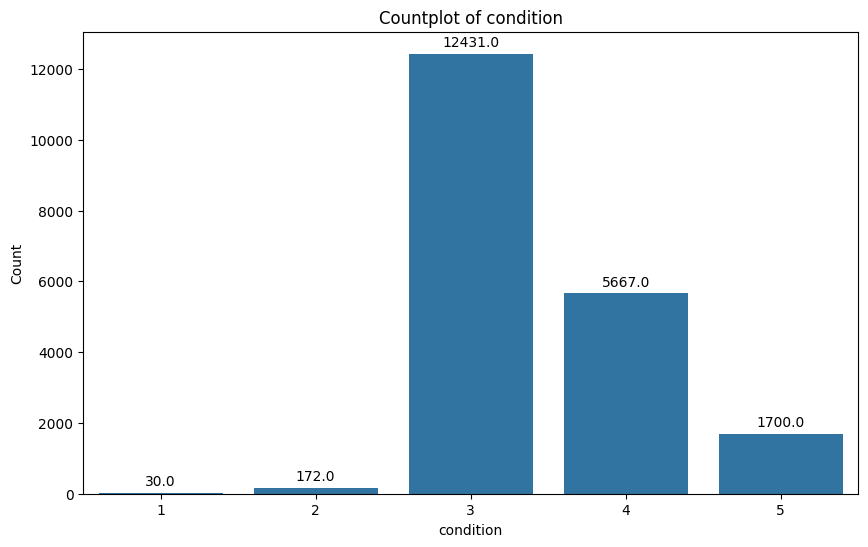

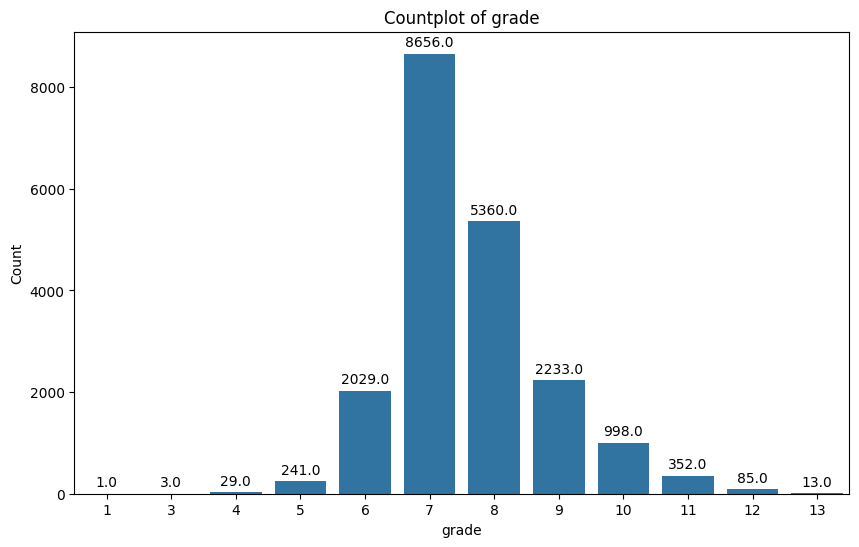

In [ ]:
# Visualizing Categorical Variables using Countplots
for variable in categorical_columns:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=categorical_df, x=variable)

    # Adding counts on top of the bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    plt.title(f"Countplot of {variable}")
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.show()

#Bi variate analysis
Analysing each column with the target variable of seling price to identify any patterns

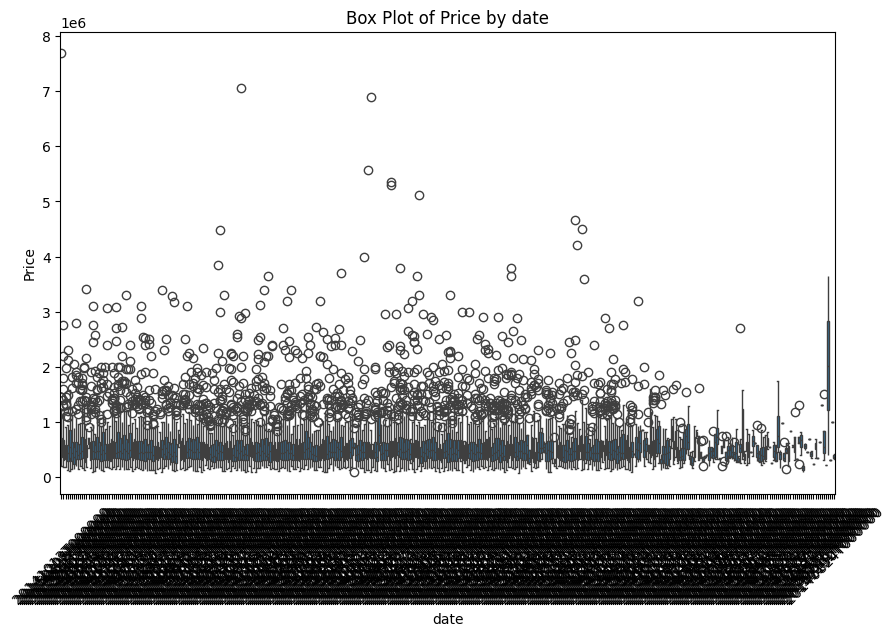

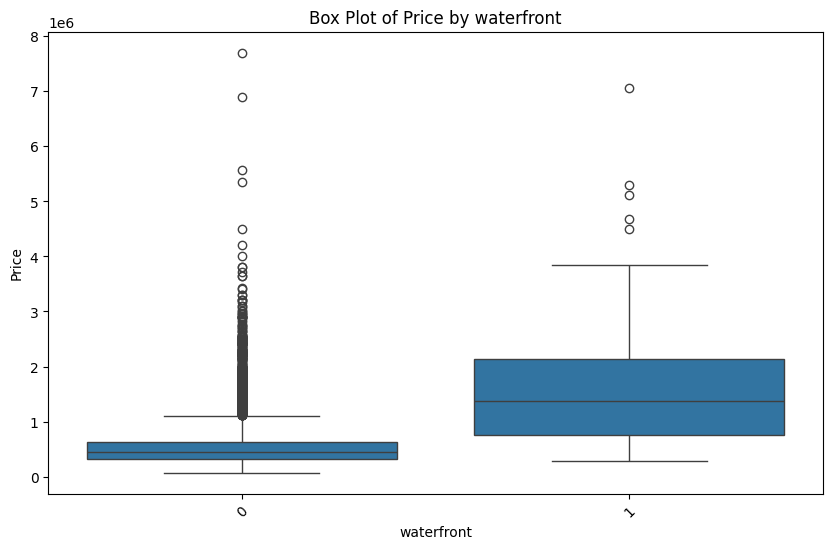

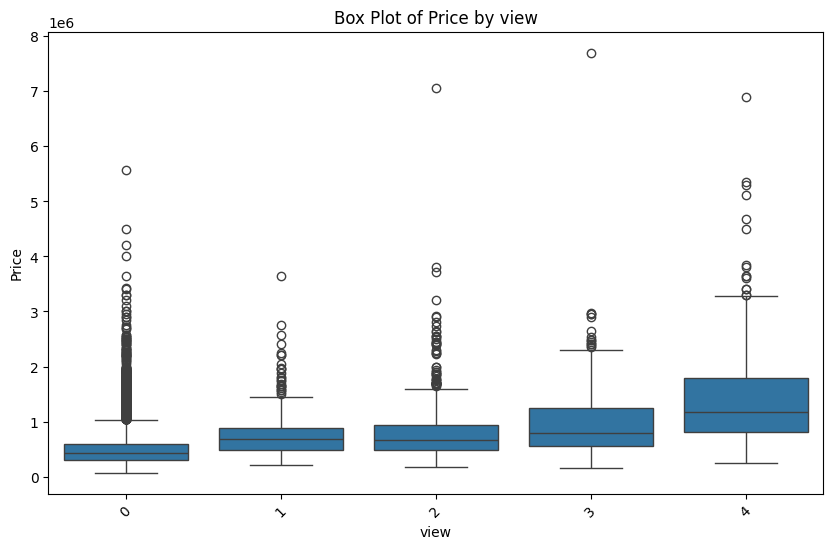

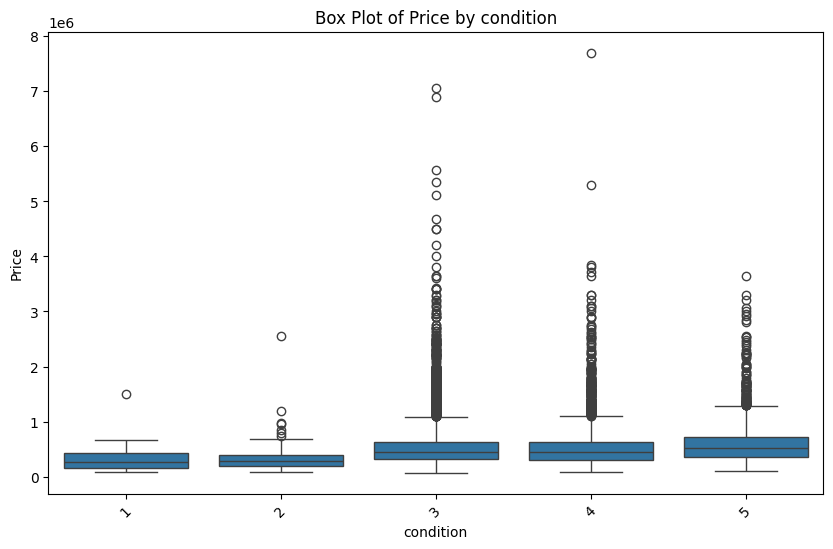

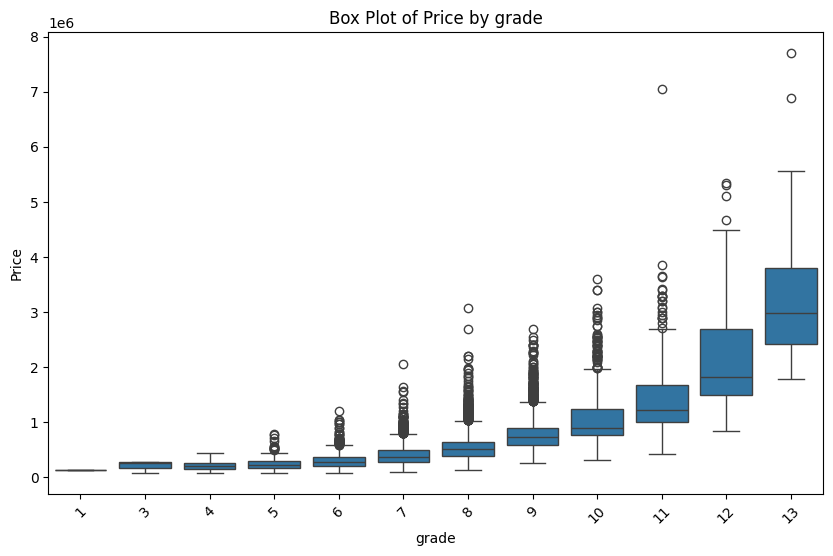

In [ ]:
# Create box plots for each categorical column in the list
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='price', data=paris_houses)
    plt.title(f'Box Plot of Price by {column}')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability
    plt.show()

In [ ]:
#Creating a list of numeric columns without price
numerical_columns_woprice = [col for col in numerical_columns if col != 'price']
print(numerical_columns_woprice)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


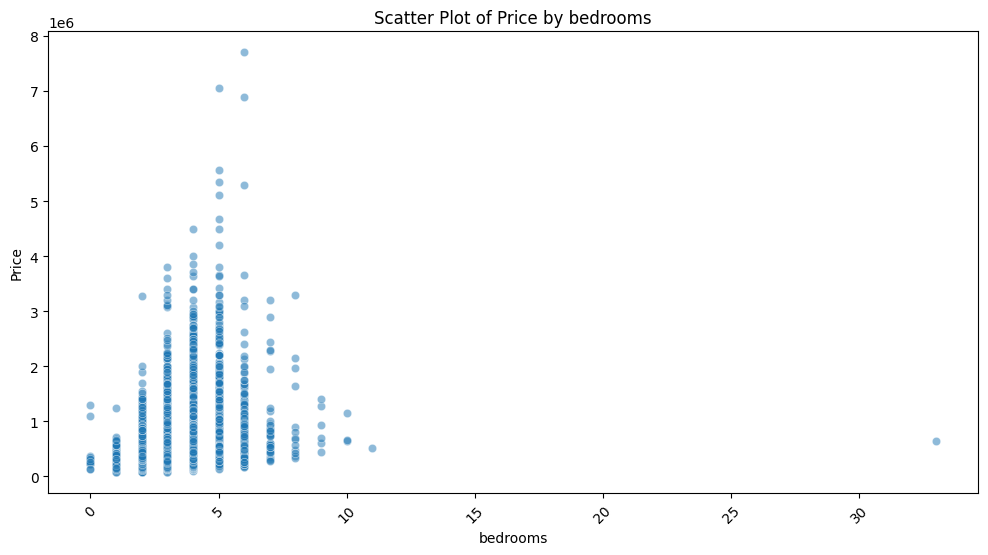

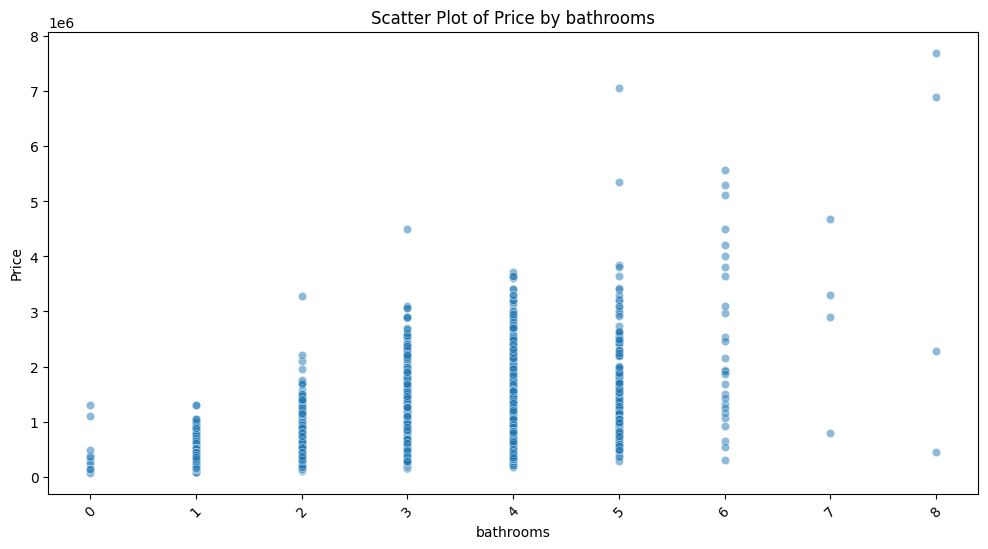

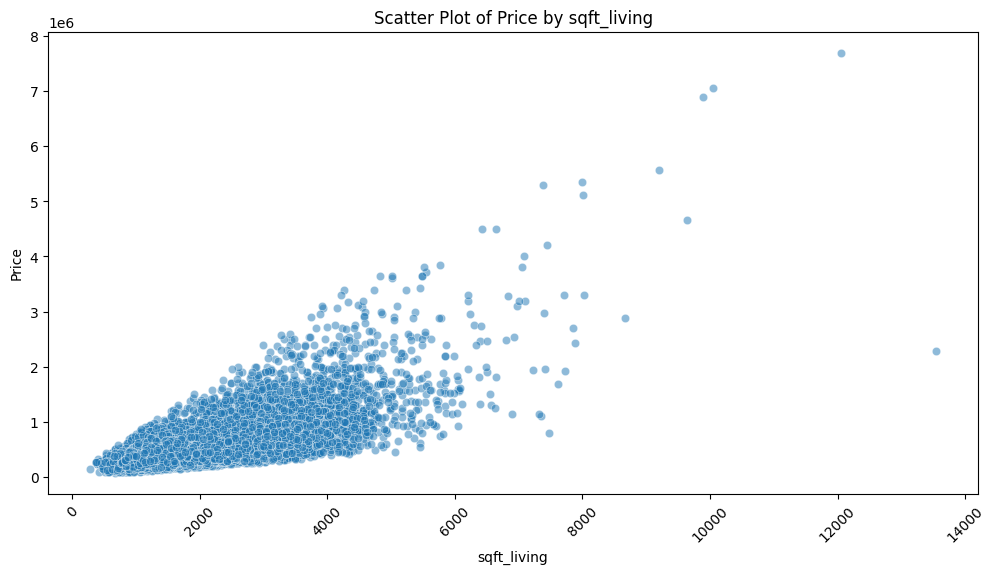

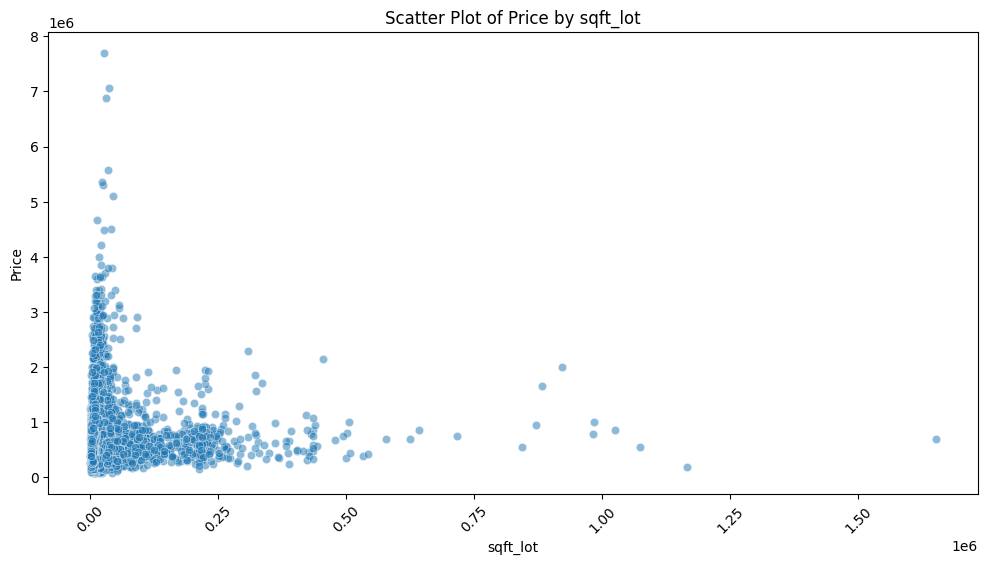

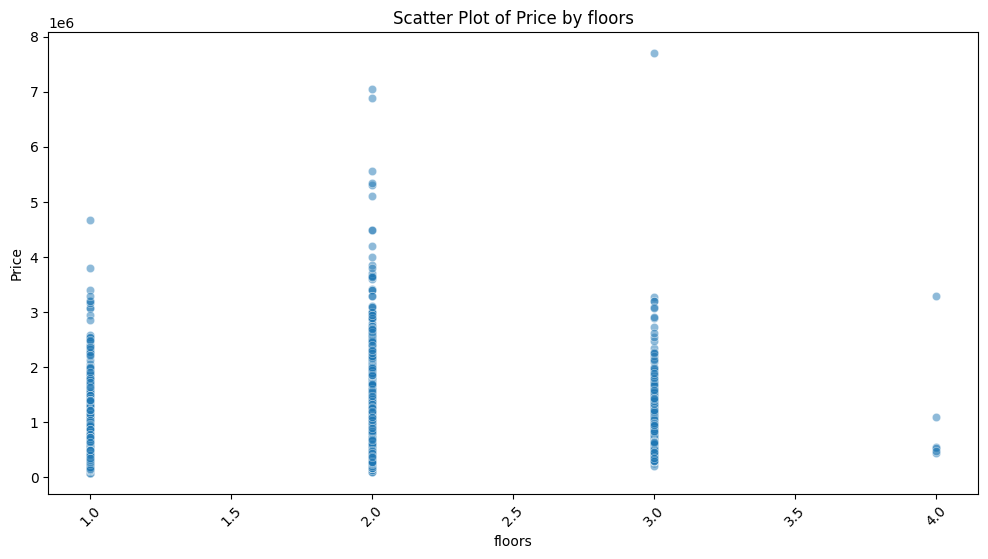

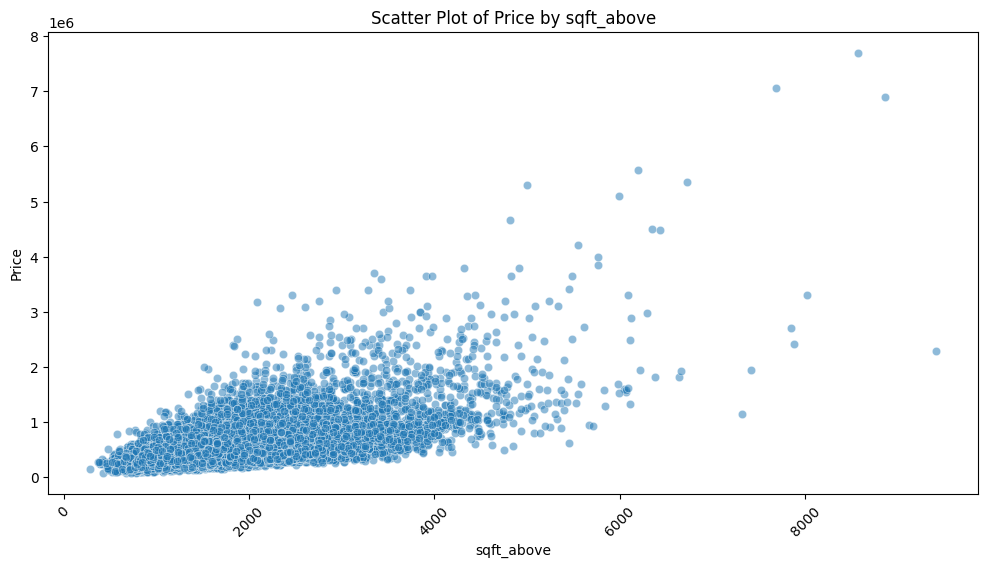

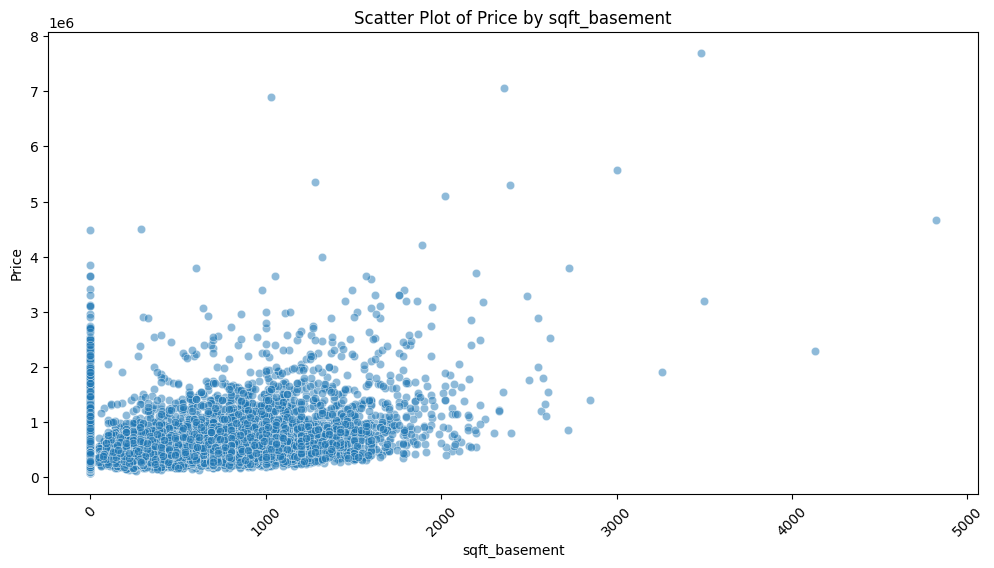

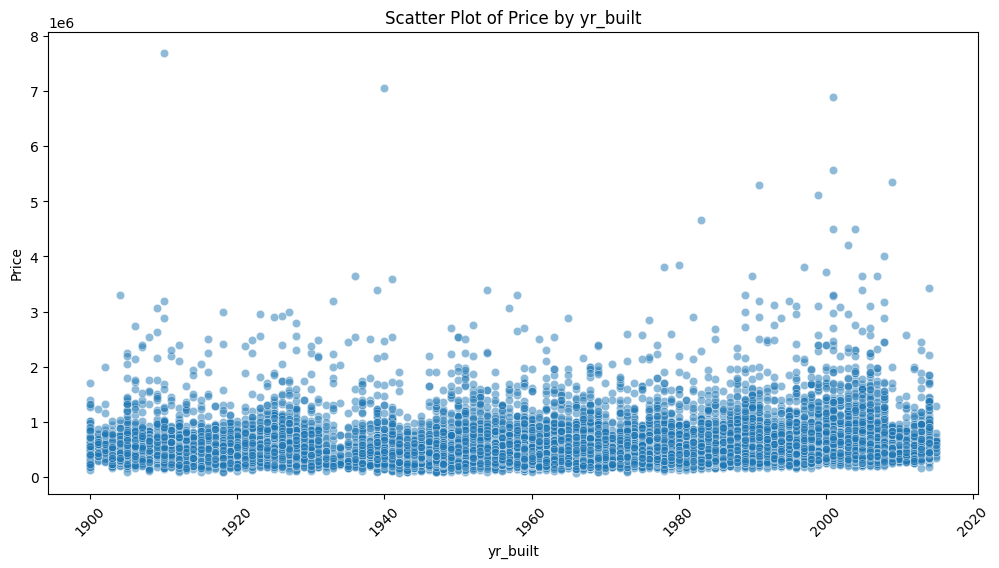

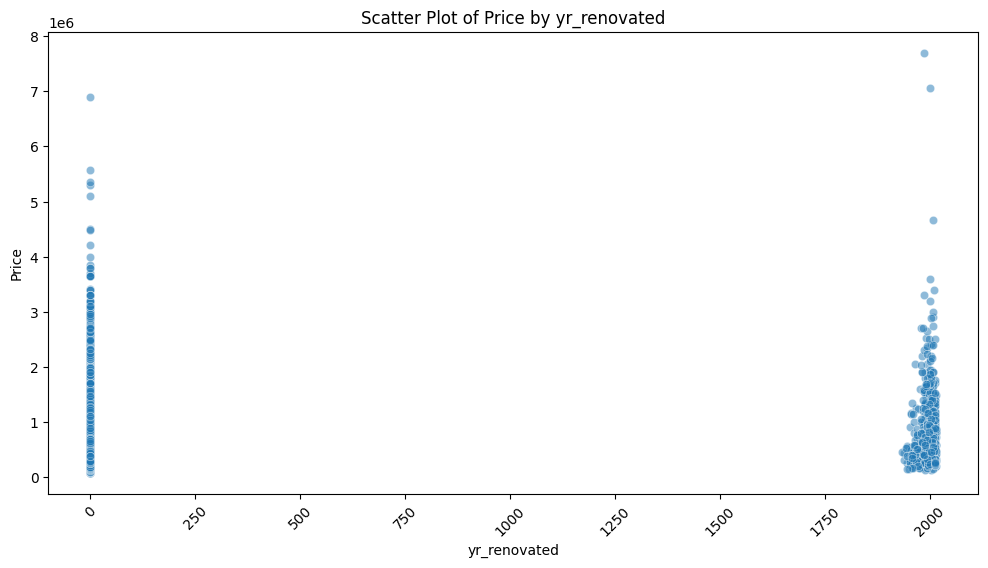

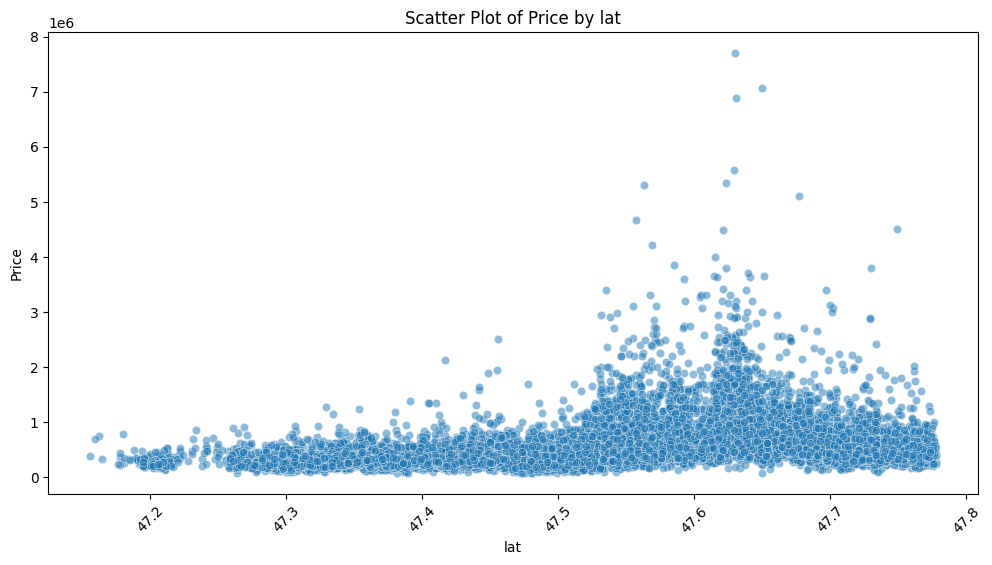

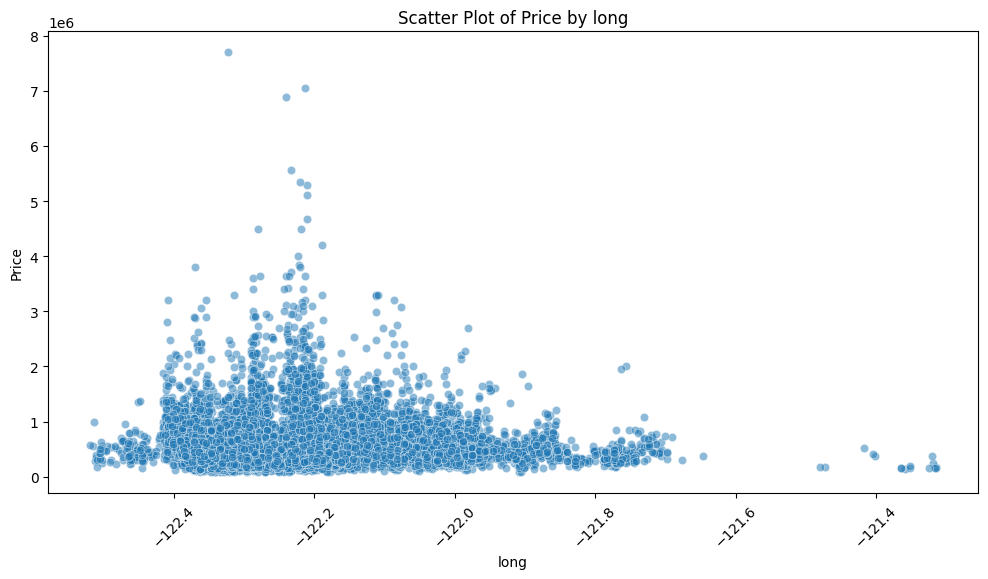

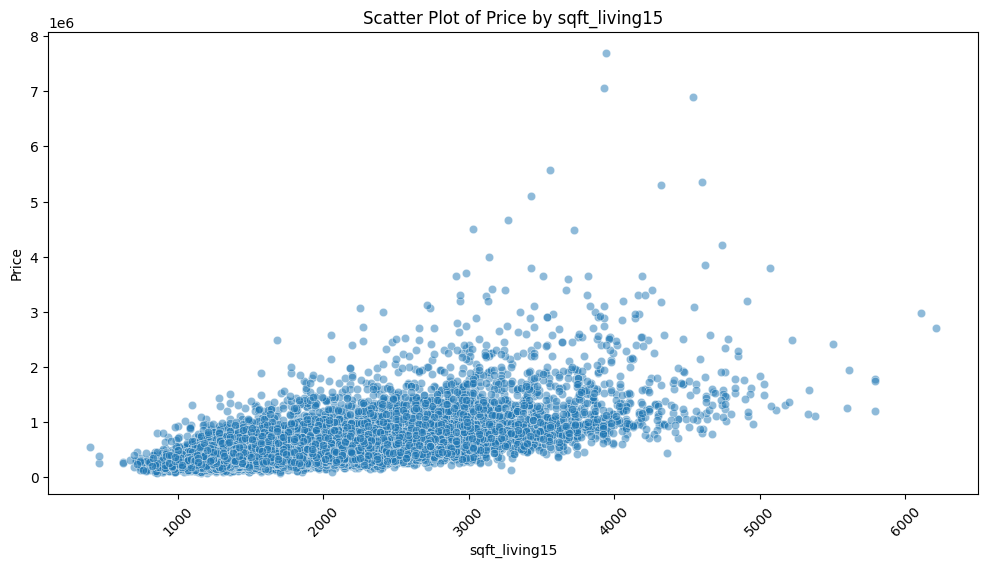

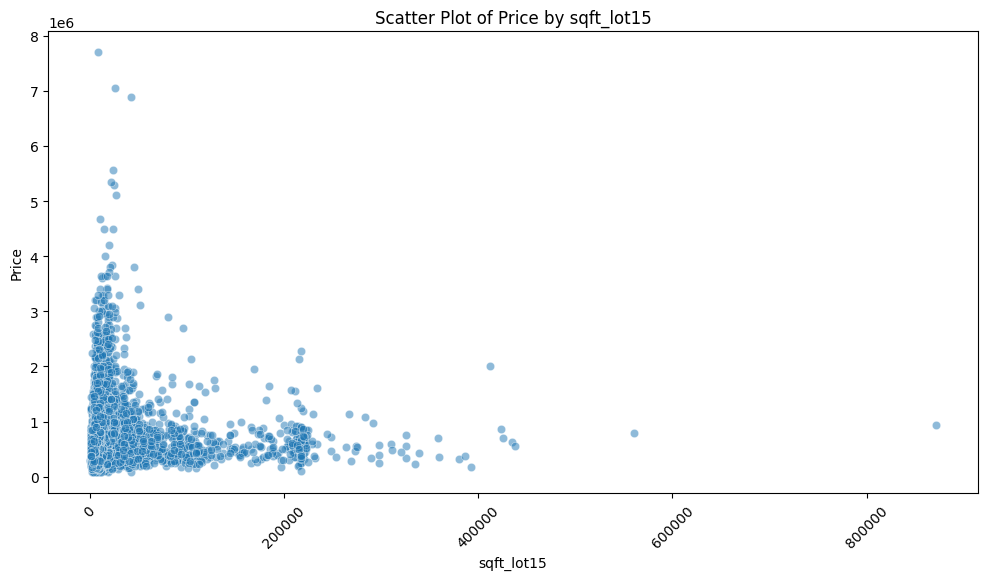

In [ ]:
# Create scatter plots for each numeric column in the list
for column in numerical_columns_woprice:
    plt.figure(figsize=(12, 6))

    # Create the scatter plot
    sns.scatterplot(x=column, y='price', data=paris_houses, alpha=0.5)  # Alpha for transparency to handle overlapping points

    # Add plot details
    plt.title(f'Scatter Plot of Price by {column}')
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed for better readability

    plt.show()

In [ ]:
#Removing rows where square footage is over 8000 and bedrooms over 10 as outliers were detected
paris_houses = paris_houses[paris_houses['sqft_living'] <= 4000]


In [ ]:
paris_houses = paris_houses[paris_houses['bedrooms'] <= 5]

In [ ]:
#paris_houses.describe(include='all')

#Multi Variate Analysis

In [ ]:
paris_houses_num = paris_houses.select_dtypes(include='number')
house_grades = pd.get_dummies(paris_houses['condition'], prefix='Condition')
house_condition= pd.get_dummies(paris_houses['grade'], prefix='Grade')
paris_houses = pd.concat([paris_houses_num, house_grades, house_condition], axis=1, join='inner')
label_col = 'SalePrice'
paris_houses.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Condition_1,Condition_2,Condition_3,Condition_4,Condition_5,Grade_1,Grade_3,Grade_4,Grade_5,Grade_6,Grade_7,Grade_8,Grade_9,Grade_10,Grade_11,Grade_12
0,7129300520,"221,900.00",3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
1,6414100192,"538,000.00",3,3,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
2,5631500400,"180,000.00",2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False
3,2487200875,"604,000.00",4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
4,1954400510,"510,000.00",3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
6,1321400060,"257,500.00",3,3,1715,6819,2,0,0,3,7,1715,0,1995,0,98003,47.31,-122.33,2238,6819,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
7,2008000270,"291,850.00",3,2,1060,9711,1,0,0,3,7,1060,0,1963,0,98198,47.41,-122.31,1650,9711,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
8,2414600126,"229,500.00",3,1,1780,7470,1,0,0,3,7,1050,730,1960,0,98146,47.51,-122.34,1780,8113,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
9,3793500160,"323,000.00",3,3,1890,6560,2,0,0,3,7,1890,0,2003,0,98038,47.37,-122.03,2390,7570,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False
10,1736800520,"662,500.00",3,3,3560,9796,1,0,0,3,8,1860,1700,1965,0,98007,47.60,-122.14,2210,8925,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False


#Dummy coding selected categorical coliumns

In [ ]:
#paris_houses.info()

In [ ]:
#Droping columns with extreme values and categoricals without useful data
paris_houses.drop(['id','waterfront','view','condition','grade','yr_renovated','sqft_lot','sqft_lot15'], axis=1, inplace=True)

#Spliting data

In [ ]:
#Spliting data 70, 30
train_size, valid_size, test_size = (0.7, 0.3, 0.0)
paris_houses_train, paris_houses_valid = train_test_split(paris_houses,
                                      test_size=valid_size,
                                      random_state=2020)

In [ ]:
label_col = 'price'

paris_houses_y_train = paris_houses_train[[label_col]]
paris_houses_x_train = paris_houses_train.drop(label_col, axis=1)
paris_houses_y_valid = paris_houses_valid[[label_col]]
paris_houses_x_valid = paris_houses_valid.drop(label_col, axis=1)

print('Size of training set: ', len(paris_houses_x_train))
print('Size of validation set: ', len(paris_houses_x_valid))

Size of training set:  13346
Size of validation set:  5721


In [ ]:
#scaling using min max scaler
scaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(paris_houses_x_train)
paris_houses_x_train = pd.DataFrame(scaler.transform(paris_houses_x_train),
                            columns = paris_houses_x_train.columns, index = paris_houses_x_train.index)
paris_houses_x_valid = pd.DataFrame(scaler.transform(paris_houses_x_valid),
                            columns = paris_houses_x_valid.columns, index = paris_houses_x_valid.index)

print('X train min =', round(paris_houses_x_train.min().min(),4), '; max =', round(paris_houses_x_train.max().max(), 4))
print('X valid min =', round(paris_houses_x_valid.min().min(),4), '; max =', round(paris_houses_x_valid.max().max(), 4))

X train min = 0.0 ; max = 1.0
X valid min = -0.0341 ; max = 1.0365


In [ ]:
paris_houses_x_valid.head()

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,Condition_1,Condition_2,Condition_3,Condition_4,Condition_5,Grade_1,Grade_3,Grade_4,Grade_5,Grade_6,Grade_7,Grade_8,Grade_9,Grade_10,Grade_11,Grade_12
340,0.80,0.40,0.61,0.33,0.61,0.00,0.54,0.26,0.86,0.35,0.42,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
13507,0.60,0.60,0.57,0.33,0.57,0.00,0.79,0.52,0.86,0.14,0.18,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
1767,0.60,0.40,0.20,0.00,0.20,0.00,0.58,0.78,0.98,0.18,0.26,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
12800,0.80,0.60,0.86,0.33,0.86,0.00,0.90,0.21,0.33,0.33,0.48,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
2746,0.80,0.60,0.63,0.33,0.63,0.00,0.76,0.29,0.44,0.30,0.42,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00


In [ ]:
paris_houses_x_train.head()

,bedrooms,bathrooms,sqft_living,floors,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,Condition_1,Condition_2,Condition_3,Condition_4,Condition_5,Grade_1,Grade_3,Grade_4,Grade_5,Grade_6,Grade_7,Grade_8,Grade_9,Grade_10,Grade_11,Grade_12
19399,0.60,0.40,0.49,0.33,0.49,0.00,0.90,0.26,0.84,0.40,0.36,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
9203,0.60,0.40,0.27,0.33,0.27,0.00,0.09,0.51,0.76,0.16,0.31,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
18071,0.60,0.60,0.84,0.33,0.84,0.00,0.72,0.58,0.85,0.20,0.28,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
17123,0.40,0.20,0.13,0.00,0.13,0.00,0.41,0.78,0.97,0.16,0.13,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
104,0.60,0.20,0.25,0.00,0.25,0.00,0.47,0.29,0.43,0.28,0.24,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00


<a id = "cell_model"></a>
## 3. Predictive Modeling

A total of 8 mlp models and 1 regression model was tested for this dataset. The mlp models were tested with different numbers of nodes, layers, activation functions and optimisers.

The best performing model is an mlp model with 4 dense layers. The first layer includes 110 nodes with 0.1 drop off, second layer 120 nodes, third layer has 50 nodes and the fourth layer has 10 nodes. All layers have the activation function relu. The learning rate of this model is set at 0.001 which yeilds the best performance.

The optimizer used for this model is RmsProp. The model measures mean absolute error to monitor the accuracy of predictions.



In [ ]:
#Loading required libraries for regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
#Loading required libraries for MLP
import tensorflow as tf
from tensorflow.keras import metrics
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,ELU
from tensorflow.keras.optimizers import Nadam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
#Converting pandas dataframes to np arrays
arr_x_train = np.array(paris_houses_x_train)
arr_y_train = np.array(paris_houses_y_train)
arr_x_valid = np.array(paris_houses_x_valid)
arr_y_valid = np.array(paris_houses_y_valid)

print('Training shape:', arr_x_train.shape)
print('Training samples: ', arr_x_train.shape[0])
print('Validation samples: ', arr_x_valid.shape[0])

Training shape: (13346, 27)
Training samples:  13346
Validation samples:  5721


Creating several models for experiments

Linear Regression Model

In [ ]:
# Initialize and train the model
model = LinearRegression()
model.fit(arr_x_train, arr_y_train)

# Predict and evaluate
y_pred = model.predict(arr_x_valid)

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(arr_y_valid, y_pred)
mae = mean_absolute_error(arr_y_valid, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(arr_y_valid, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 27058142685.971508
Mean Absolute Error: 108675.47621286317
Root Mean Squared Error: 164493.59466548084
R^2 Score: 0.6594900922968687


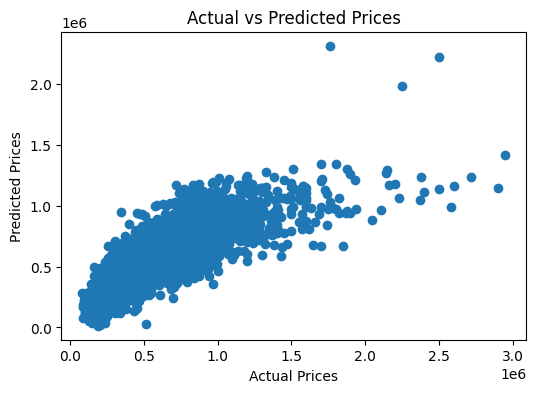

The Correlation between true and predicted values is:  0.812


In [ ]:


# Scatter plot of actual vs predicted prices
plt.scatter(arr_y_valid, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Compute the correlation coefficient
arr_y_valid_flat = arr_y_valid.flatten()
y_pred_flat = y_pred.flatten()

# Compute correlation
corr_result = np.corrcoef(arr_y_valid_flat, y_pred_flat)
print('The Correlation between true and predicted values is: ', round(corr_result[0, 1], 3))


#Creating different MLP Models

In [ ]:
#Basic model 7
def model_7(x_size, y_size):
    t_model = Sequential()
    t_model.add(Dense(110, activation="relu", input_shape=(x_size,)))
    t_model.add(Dropout(0.1))
    t_model.add(Dense(120, activation="relu"))
    t_model.add(Dense(50, activation="relu"))
    t_model.add(Dense(10, activation="relu"))
    t_model.add(Dense(y_size))
    t_model.compile(
        loss='mean_absolute_error',
        optimizer=RMSprop(learning_rate=0.001, rho=0.9, momentum=0.5, epsilon=1e-07, weight_decay=0.0,),
        metrics=[metrics.mae])
    return(t_model)

#Initiating a model

In [ ]:
#Created model
model = model_7(arr_x_train.shape[1], arr_y_train.shape[1])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 110)                 │           3,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 110)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 120)                 │          13,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 50)                  │           6,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             510 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,971 (89.73 KB)

 Trainable params: 22,971 (89.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(
    monitor='mean_absolute_error',# Monitors the mae
    mode='min',
    patience=20,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores the model weights from the epoch with the best validation loss
)

#Model execution

In [ ]:
history = model.fit(arr_x_train, arr_y_train,
    batch_size=40,
    epochs=500,
    shuffle=True,
    verbose=2,
    callbacks=[early_stopping],
    validation_data=(arr_x_valid, arr_y_valid))

Epoch 1/500
334/334 - 3s - 8ms/step - loss: 273372.2188 - mean_absolute_error: 273372.2188 - val_loss: 147985.1562 - val_mean_absolute_error: 147985.1562
Epoch 2/500
334/334 - 1s - 3ms/step - loss: 129708.0625 - mean_absolute_error: 129708.0625 - val_loss: 119091.8281 - val_mean_absolute_error: 119091.8281
Epoch 3/500
334/334 - 1s - 3ms/step - loss: 113021.8359 - mean_absolute_error: 113021.8359 - val_loss: 110634.0156 - val_mean_absolute_error: 110634.0156
Epoch 4/500
334/334 - 2s - 6ms/step - loss: 107746.3672 - mean_absolute_error: 107746.3672 - val_loss: 107617.8516 - val_mean_absolute_error: 107617.8516
Epoch 5/500
334/334 - 2s - 5ms/step - loss: 105805.8203 - mean_absolute_error: 105805.8203 - val_loss: 105657.5000 - val_mean_absolute_error: 105657.5000
Epoch 6/500
334/334 - 2s - 6ms/step - loss: 104469.2344 - mean_absolute_error: 104469.2344 - val_loss: 104305.8047 - val_mean_absolute_error: 104305.8047
Epoch 7/500
334/334 - 2s - 5ms/step - loss: 103308.3438 - mean_absolute_erro

Evaluvate and report performance of model 1

In [ ]:
train_score = model.evaluate(arr_x_train, arr_y_train, verbose=0)
valid_score = model.evaluate(arr_x_valid, arr_y_valid, verbose=0)

print('Train MAE: ', round(train_score[1], 2), ', Train Loss: ', round(train_score[0], 2))
print('Val MAE: ', round(valid_score[1], 2), ', Val Loss: ', round(valid_score[0], 2))

Train MAE:  62029.21 , Train Loss:  62029.21
Val MAE:  68382.33 , Val Loss:  68382.33


Plotting true vs predicted values

179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


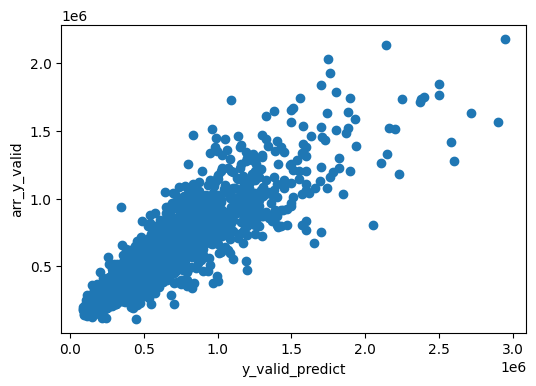

The Correlation between true and predicted values is:  0.914


In [ ]:
y_valid_predict = model.predict(arr_x_valid)
# plot
plt.scatter(arr_y_valid, y_valid_predict)
plt.ylabel('arr_y_valid')
plt.xlabel('y_valid_predict')
plt.show()

corr_result = np.corrcoef(arr_y_valid.reshape(1,5721)[0], y_valid_predict.reshape(1,5721)[0])
print('The Correlation between true and predicted values is: ',round(corr_result[0,1],3))

In [ ]:
def plot_hist(h, xsize=6, ysize=5):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]

    # Get training and validation keys
    ks = list(h.keys())
    n2 = math.floor(len(ks)/2)
    train_keys = ks[0:n2]
    valid_keys = ks[n2:2*n2]

    # summarize history for different metrics
    for i in range(n2):
        plt.plot(h[train_keys[i]])
        plt.plot(h[valid_keys[i]])
        plt.title('Training vs Validation '+train_keys[i])
        plt.ylabel(train_keys[i])
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper left')
        plt.draw()
        plt.show()

    return

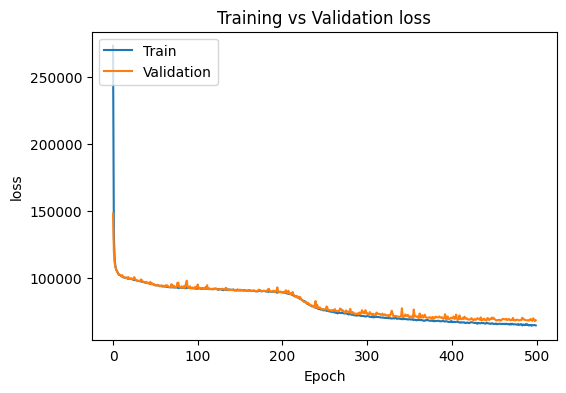

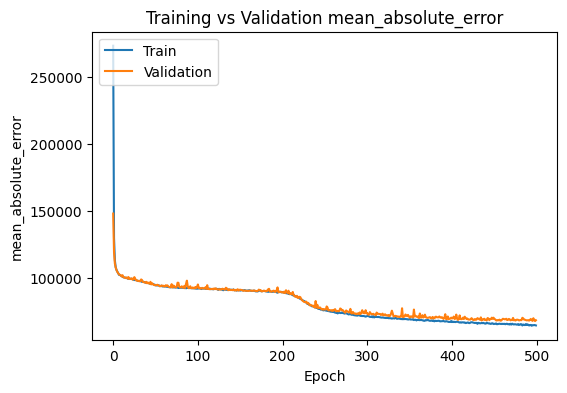

In [ ]:
hist = pd.DataFrame(history.history)

# Plot history
plot_hist(hist, xsize=6, ysize=4)

<a id = "cell_report"></a>
## 4. Experiments Report

**Overview**

The mlp model 6 with the learning rate at 0.001 is the best performing model.
This model has an testing mean absolute error value of 68382.33 and a testing mean absolute error of 62029.21. This model has less gap between testing and training mae values which indicates that the model is able to generalise well, which was not seen on other mlp models tested.

Further, this model's mae (68382.33) value is significantly less than that of the regression model (108675.47). This increase in accuracy is due to the models increased complexity with multiple nodes and layers which the regression model does not have.

However, during the experiments it was noted that models which have even higher nodes or layers would tend to have a higher mae value. This is evident in model 7 which has 5 layers with nodes respectivly 120,100,80, 50 and 20. There are drop out layers added to model 7 but still the increased number of layers and nodes makes that model too complex. That model has a higher testing mae at 101588 and training mae of 96306.48 indicating that it overfits the training data.

Not only does the model 6 (best one) learns better than the model 7 and is more accurate than model 7 at testing too. The model 2 which is also relativly simpler is performing well at 65808 testing mae and 71 validation mae. But the added complexity of model 6 enables it to genaralise new data better. It is importat to note that model 6's learning rate impacts its performance significantly. When it is set to 0.5 the mae will increase,(see table below).

Further, the model 6's correlation score between its predictions and actual value is high at 0.91 which indicates a strong positive relationship.

**Limitations**

However, the mean absolute value of 68382.33 can be a limitation of this model. Therefore, to improve this model it is recomended to train it with more generalised data with less extreme values. Further, if the data consisted of data such as building type, it would be an important aspect for model performance as well as practical uses.

**Use cases**

This model is suitable to be deployed for use by house valuation companies, insurance companies or for genera real estate purposes.

In [ ]:
models_1_path = '/content/Book5.xlsx'

# Read the Excel file into a pandas DataFrame
performance_models = pd.read_excel(models_1_path,sheet_name ='Sheet2')
# Display the contents of the Excel file
performance_models.head(20)

,Model name,Architecture,Training MAE,Validation MAE,Correlation of predictions and errors
0,Regression model,Linear regression,NaN,"108,675.47",0.81
1,Model 1,"Layer 1: 50 nodes, ReLU activation\nLayer 2: 2...","102,857.11","103,269.11",0.83
2,Model 2,"Layer 1: 100 nodes, ReLU activation\n Dropout ...","65,808.59","71,895.90",0.90
3,Model 3,"Layer 1: 100 nodes, ReLU activation\nDropout (...","75,236.31","79,229.76",0.90
4,Model 4,"Layer 1: 80 nodes, ReLU activation\nLayer 2: 1...","139,333.36","143,723.42",0.90
5,Model 5,"Layer 1: 150 nodes, ReLU activation\nDropout (...","99,764.48","107,576.36",0.90
6,Best model Model 6 (Learning rate 0.001),"Layer 1: 110 nodes, ReLU activation\nDropout (...","62,029.21","68,382.33",0.91
7,Model 6 (Learning rate 0.05),"Layer 1: 110 nodes, ReLU activation\nDropout (...","91,615.16","93,170.70",0.91
8,Model 7,"Layer 1: 120 nodes, ReLU activation\nDropout 0...","96,306.48","101,588.85",0.90
